# ReadMe

In this simulation, I calculate the following information.

For a specific incident direction, scan the energy of incident photon. Then calculate the intensity reflectivity for different energies.

Unless explicitly specified, the basic units in this notebook are constructed from um, fs and keV without other constant.

In [1]:
import sys
sys.path.append("../../../XRaySimulation")

import numpy as np
import matplotlib.pyplot as plt

from XRaySimulation import util, misc, Crystal

 ![](Example1.png)

# Specify the crystal 

In [2]:
# The length of the reciprocal lattice
h_length = 2. * np.pi / (2.0593 * 1e-4)

# Some crystal properties
chi_dict = {"chi0":complex(-0.53234E-04, 0.27261E-06),
            "chih_sigma":complex(0.19458E-04, -0.19050E-06),
            "chihbar_sigma":complex(0.19458E-04, -0.19050E-06),
            "chih_pi":complex(0.66630E-05, -0.65232E-07),
            "chihbar_pi":complex(0.66630E-05, -0.65232E-07)
           }

# Initialize the crystals
my_crystal = Crystal.CrystalBlock3D(h=h_length * np.array([-1, -1, -1]) / np.sqrt(3),
                                    normal=np.array([0,0,1]),
                                    surface_point=np.zeros(3),
                                    thickness=1e9,
                                    chi_dict=chi_dict)

# Specify incident wave vectors

In [3]:
central_energy = 5.214075880419964  #kev
number_wavevec = 50000  # The number of wave vector to calculate 
energy_range = 2e-3 #keV.  The energy to calculate the reflectivity


# Convert the energy to the wave vector
central_wavevec = np.array([0,0, util.kev_to_wavevec_length(central_energy)])
#central_wavevec = np.array([0,0, h_length / 2. / (1/np.sqrt(3))])

# Get the wave vector array and other axes info
k_in_grid, axis_info = util.get_k_mesh_1d(number = number_wavevec, energy_range = energy_range)

# Add the reference wave vector to the wave vector
k_in_grid += central_wavevec[np.newaxis, :]

# Get the reflectivity

In [4]:
(reflect_sigma, 
 reflect_pi,
 b,
 kout_grid) = util.get_bragg_reflection_array(kin_grid = k_in_grid,
                                         d = my_crystal.thickness,
                                         h = my_crystal.h,
                                         n = my_crystal.normal,
                                         chi0 = my_crystal.chi0,
                                         chih_sigma = my_crystal.chih_sigma,
                                         chihbar_sigma = my_crystal.chihbar_sigma,
                                         chih_pi = my_crystal.chih_pi,
                                         chihbar_pi = my_crystal.chihbar_pi)
print("Finish calculating the reflectivity")

sigma_reflectivity = np.abs(np.square(reflect_sigma)) / np.abs(b)
pi_reflectivity = np.abs(np.square(reflect_pi)) / np.abs(b)

[0.33307752 0.33307753 0.33307754 ... 0.33358893 0.33358894 0.33358895]
Finish calculating the reflectivity


In [5]:
b

array([3.00230411, 3.00230402, 3.00230393, ..., 2.99770137, 2.99770127,
       2.99770118])

In [6]:
np.dot(my_crystal.h, my_crystal.normal)

-17615.688478941564

# Show the reflectivity

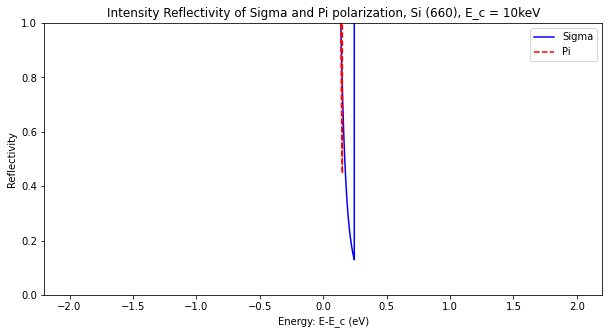

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(5)
fig.set_figwidth(10)

axes.plot(axis_info['energy_grid'] * 1000, sigma_reflectivity,'b', label="Sigma")
axes.plot(axis_info['energy_grid'] * 1000, pi_reflectivity,'r--', label="Pi")

axes.legend(loc = "upper right")
axes.set_title("Intensity Reflectivity of Sigma and Pi polarization, Si (660), E_c = 10keV")
axes.set_xlabel("Energy: E-E_c (eV)")
axes.set_ylabel("Reflectivity")

axes.set_ylim([0,1])

plt.show()

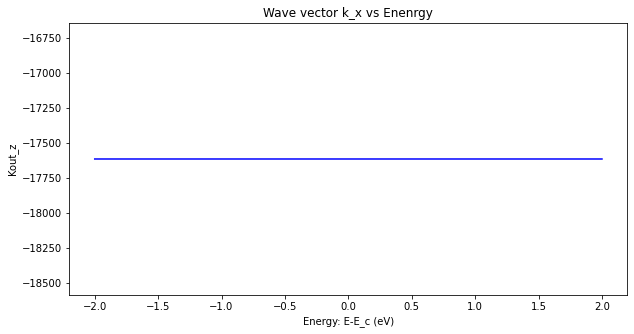

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(5)
fig.set_figwidth(10)

axes.plot(axis_info['energy_grid'] * 1000, kout_grid[:,0], 'b')

axes.set_title("Wave vector k_x vs Enenrgy")
axes.set_xlabel("Energy: E-E_c (eV)")
axes.set_ylabel("Kout_z")

plt.show()

# Get Bandwidth

In [9]:
fwhm_sigma = misc.get_fwhm(coordinate=axis_info["energy_grid"],
                           curve_values=sigma_reflectivity)

print("The fwhm of the reflectivity curver of the sigma polarization is")
print("{:.6e} eV".format(fwhm_sigma * 1000))

fwhm_pi = misc.get_fwhm(coordinate=axis_info["energy_grid"],
                           curve_values=pi_reflectivity)

print("The fwhm of the reflectivity curver of the pi polarization is")
print("{:.6e} eV".format(fwhm_pi * 1000))

The fwhm of the reflectivity curver of the sigma polarization is
4.000000e+00 eV
The fwhm of the reflectivity curver of the pi polarization is
4.000000e+00 eV
